# Introduction to dataset

What is speed dating?
In today’s busy world, finding and dating a romantic partner seems more time consuming than ever. As a result, speed dating is here as a solution that allows one to meet and interact with a large number of potential partners in a short amount of time. 

# Library Preparation

In [1]:
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 1000 #handy for showing truncated results
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Exploratory Data Analysis

In [2]:
# the encoding is used to handle funky errors in this dataset
dating = pd.read_csv('./Speed Dating Data.csv', encoding="ISO-8859-1")

In [3]:
dating.head(10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking null values is important in data science because you need clean data in order to build good models. 
# Remember, garbage in equals garbage out
dating.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

# Data cleanup

Text(0, 0.5, 'Frequency')

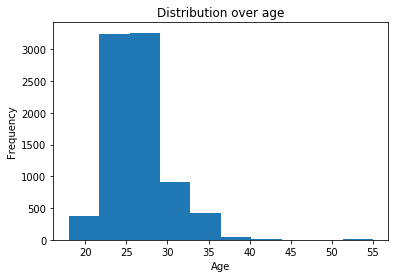

In [5]:
# age distribution of participants
age = dating[np.isfinite(dating['age'])]['age']
plt.hist(age.values)
plt.title('Distribution over age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [6]:
# Let's see how many speed daters found a match!. 0 here means NO and 1 means YES.
pd.crosstab(index=dating['match'],columns="count")

col_0,count
match,
0,6998
1,1380


In [7]:
# narrowing dataset into small subsets
dating_1 = dating.iloc[:, 11:28]
dating_2 = dating.iloc[:, 30:35]
dating_3 = dating.iloc[:, 39:43]
dating_4 = dating.iloc[:, 45:67]
dating_5 = dating.iloc[:, 69:74]
dating_6 = dating.iloc[:, 87:91]
dating_7 = dating.iloc[:, 97:102]
dating_8 = dating.iloc[:, 104:107]

date = pd.concat([dating.iloc[:, 0],dating.iloc[:, 2],dating_1,dating_2,dating_3,dating_4,dating_5,
                  dating_6,dating_7,dating_8], axis=1)

In [8]:
# As I mentioned before, we need to clear out the NaN values. So here it goes.
date2 = date.dropna()

In [9]:
# Let's check again. Cool, we have 6797 non-null rows. We're good to go.
date2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6797 entries, 30 to 8377
Data columns (total 67 columns):
iid         6797 non-null int64
gender      6797 non-null int64
pid         6797 non-null float64
match       6797 non-null int64
int_corr    6797 non-null float64
samerace    6797 non-null int64
age_o       6797 non-null float64
race_o      6797 non-null float64
pf_o_att    6797 non-null float64
pf_o_sin    6797 non-null float64
pf_o_int    6797 non-null float64
pf_o_fun    6797 non-null float64
pf_o_amb    6797 non-null float64
pf_o_sha    6797 non-null float64
dec_o       6797 non-null int64
attr_o      6797 non-null float64
sinc_o      6797 non-null float64
intel_o     6797 non-null float64
fun_o       6797 non-null float64
like_o      6797 non-null float64
prob_o      6797 non-null float64
met_o       6797 non-null float64
age         6797 non-null float64
field       6797 non-null object
race        6797 non-null float64
imprace     6797 non-null float64
imprelig    6797 no

In [10]:
# creating an object-free dataframe for later use
date3 = date2.drop(['field', 'from', 'career'], axis=1)

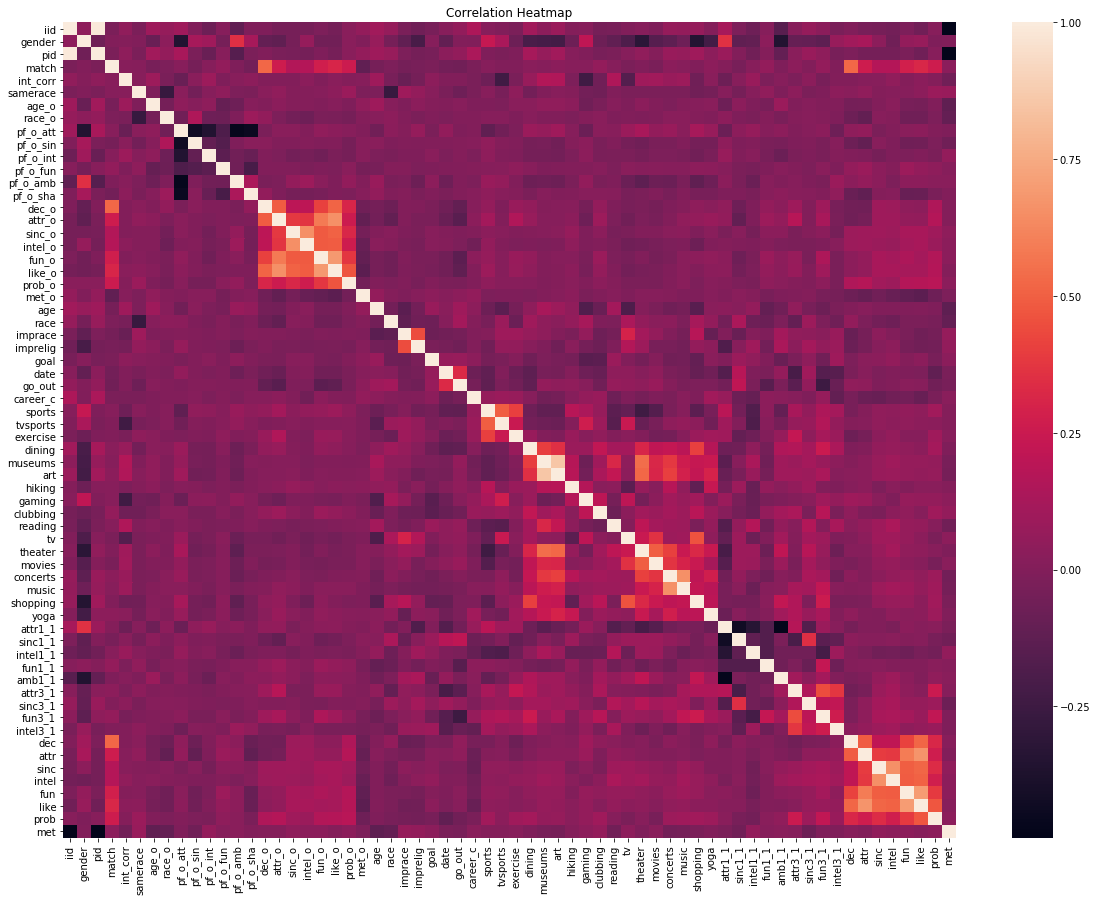

In [11]:
# heatmap
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = date3.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda2/envs/py3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda2/envs/py3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


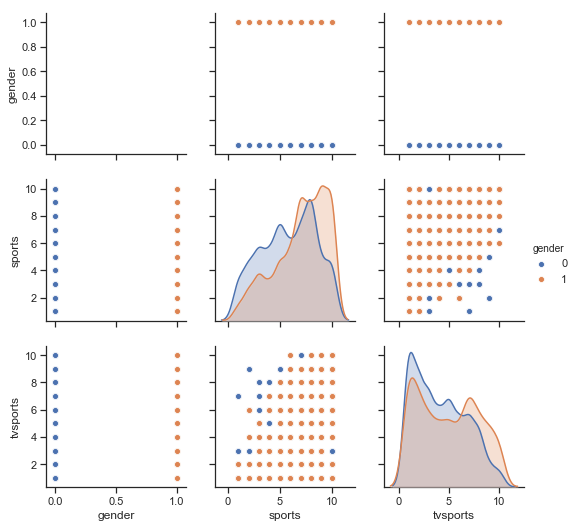

In [12]:
# just for fun, looking at interest overlap
sns.set(style="ticks", color_codes=True)
date_int = pd.concat([date3.iloc[:, 1],date3.iloc[:, 30:32]],axis = 1)
g = sns.pairplot(date_int, hue="gender")

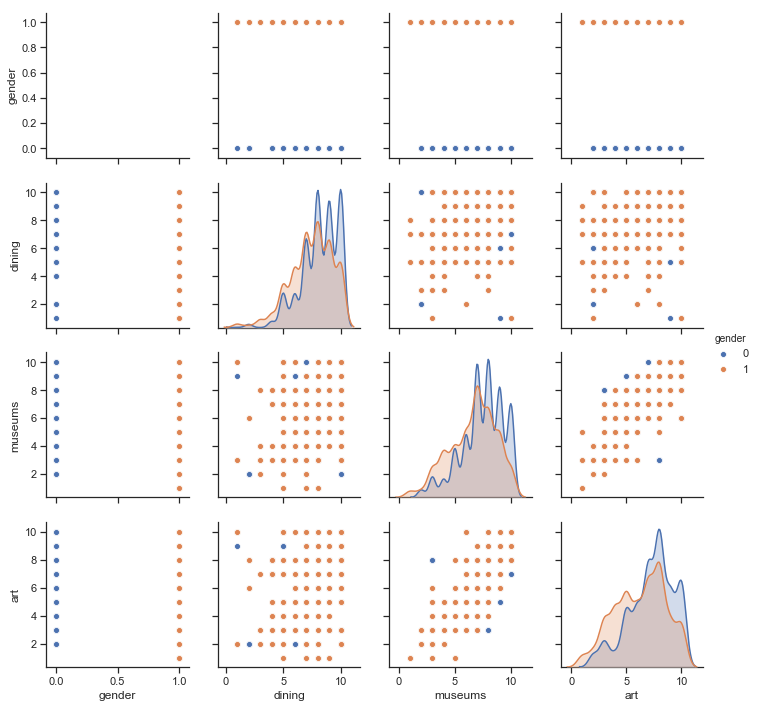

In [13]:
# just for fun, looking at interest overlap
sns.set(style="ticks", color_codes=True)
date_int = pd.concat([date3.iloc[:, 1],date3.iloc[:, 33:36]],axis = 1)
g = sns.pairplot(date_int, hue="gender")

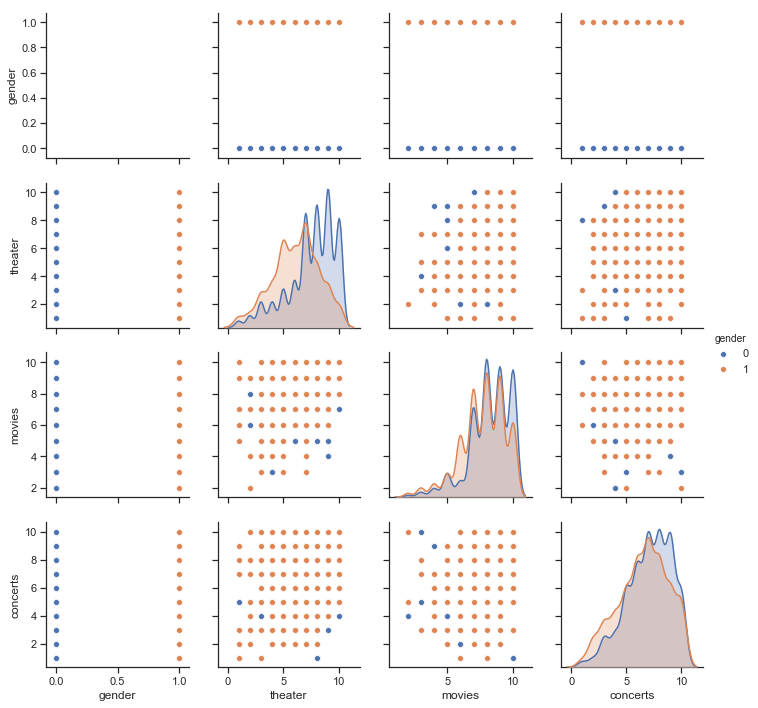

In [14]:
# just for fun, looking at interest overlap
sns.set(style="ticks", color_codes=True)
date_int2 = pd.concat([date3.iloc[:, 1],date3.iloc[:, 41:44]],axis = 1)
g = sns.pairplot(date_int2, hue="gender")

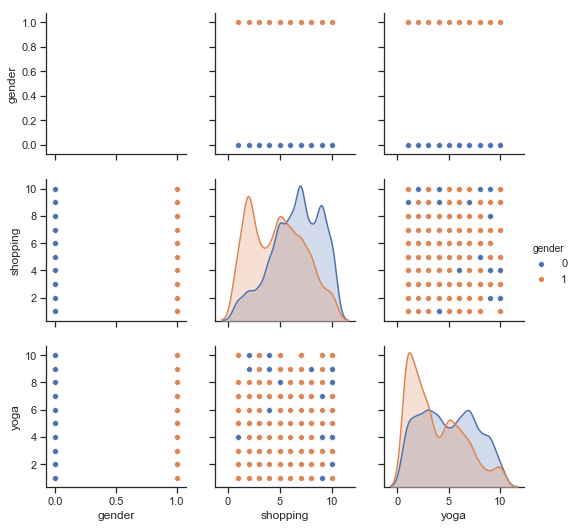

In [15]:
# just for fun, looking at interest overlap
sns.set(style="ticks", color_codes=True)
date_int3 = pd.concat([date3.iloc[:, 1],date3.iloc[:, 45:47]],axis = 1)
g = sns.pairplot(date_int3, hue="gender")

In [16]:
# removing interests that are not commonly shared by both genders
date4 = date3.drop(['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
                   'shopping', 'yoga'], axis=1)

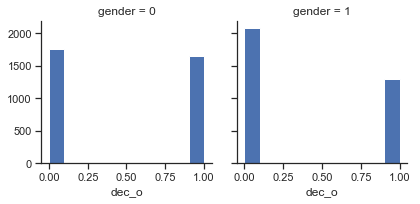

In [17]:
# looking at dec_o by gender
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(date4, col="gender")
g = g.map(plt.hist, "dec_o")
plt.ticklabel_format(useOffset=False, style='plain')

In [18]:
# unrequited love count
no_love_count = len(date4[(date4['dec_o']==0) & (date4['dec']==1)]) 
+ len(date4[(date4['dec_o']==1) & (date4['dec']==0)])
perc_broken_heart = no_love_count / len(date4.index)
perc_broken_heart*100

26.040900397234072

In [19]:
# encoding unrequited love as a new column
date4['url']=np.where(((date4['dec_o']==0) & (date4['dec']==1))|((date4['dec']==0) & (date4['dec_o']==1)),1,0)

Text(0.5, 0, 'Broken Heart')

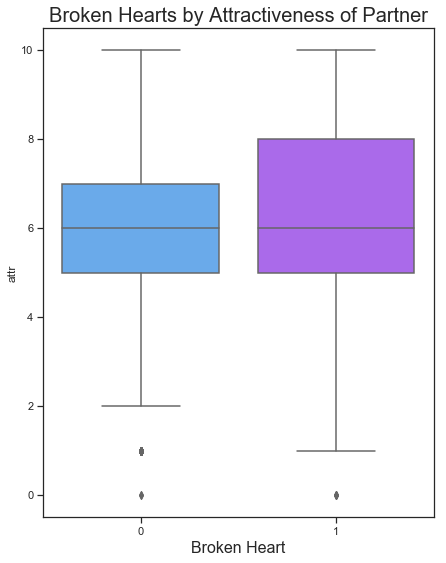

In [20]:
# looking at url by attractiveness
plt.figure(figsize=(7,9))
sns.boxplot(x='url', y='attr', data=date4, palette='cool')
plt.title('Broken Hearts by Attractiveness of Partner', fontsize=20)
plt.xlabel('Broken Heart', fontsize=16)

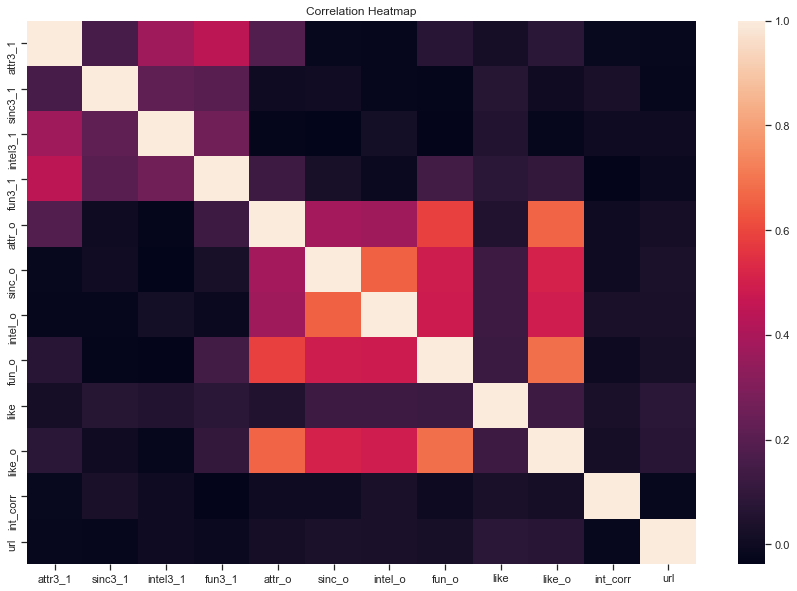

In [21]:
date5 = pd.concat([date4['attr3_1'],date4['sinc3_1'],date4['intel3_1'],date4['fun3_1'],date4['attr_o'],
                   date4['sinc_o'],date4['intel_o'],date4['fun_o'],date4['like'],date4['like_o'], 
                   date4['int_corr'],date4['url']],axis=1)
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = date5.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Build and Evaluate Model

In [39]:
# Preprocessing data
X=date4[['like','dec', 'fun']]
y=date4['match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
# logistic regression
model1 = LogisticRegression(C=1, random_state=0)
lrc = model1.fit(X_train, y_train)
predict_train_lrc = lrc.predict(X_train)
predict_test_lrc = lrc.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_lrc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_lrc))

Training Accuracy: 0.8265713685095648
Validation Accuracy: 0.8318627450980393


/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
# Decision tree model
model2 = RandomForestClassifier()
dtc_model = model2.fit(X_train, y_train)
predict_train_dtc = dtc_model.predict(X_train)
predict_test_dtc = dtc_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_dtc))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_dtc))

Training Accuracy: 0.8347698129072945
Validation Accuracy: 0.8235294117647058


/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
# random forest model
model3 = RandomForestClassifier()
rf_model = model3.fit(X_train, y_train)
predict_train_rf = rf_model.predict(X_train)
predict_test_rf = rf_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_rf))

Training Accuracy: 0.8347698129072945
Validation Accuracy: 0.8269607843137254


/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [43]:
# xgboost model
model4 = GradientBoostingClassifier()
xgb_model = model4.fit(X_train, y_train)
predict_train_xgb = xgb_model.predict(X_train)
predict_test_xgb = xgb_model.predict(X_test)
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_xgb))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_xgb))

Training Accuracy: 0.833718730292201
Validation Accuracy: 0.8215686274509804


# Conclusion